# This is breast cancer classification project
**Information about data can be found in "SEER Breast Cancer Dataset.docx" file**

### Analysis is divided in several parts:
* [Data reading and cleaning](#Data-reading-and-cleaning)
* [EDA + Visualizations](#EDA-+-Visualizations)
* [Models](#Models)

In [12]:
# some base imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# additional imports
import sys
first_steps_path = r"..\utils\common_utils"
if first_steps_path not in sys.path:
    sys.path.append(first_steps_path)
from first_steps import first_descriptions
# some basic settings
pd.set_option('display.max_columns', 100)

plt.style.use('seaborn-v0_8-deep')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data reading and cleaning

In [13]:
cancer_raw_data = pd.read_csv("SEER Breast Cancer Dataset .csv")
# there are mistake in data, so it has fully-nulled column, so we drop it
cancer_raw_data = cancer_raw_data.drop('Unnamed: 3', axis = 1)

In [14]:
first_descriptions(cancer_raw_data)

************************************************* Dataset first description **************************************************
****************************************************** Head of dataset *******************************************************


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


*************************************************** Pandas-Generated info ****************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-

None

************************************************ Categorical features unique *************************************************
Race 
['Other (American Indian/AK Native, Asian/Pacific Islander)' 'White'
 'Black'] 

Marital Status
['Married (including common law)' 'Divorced' 'Single (never married)'
 'Widowed' 'Separated'] 

T Stage 
['T2' 'T1' 'T3' 'T4'] 

N Stage
['N3' 'N2' 'N1'] 

6th Stage
['IIIC' 'IIIA' 'IIB' 'IIA' 'IIIB'] 

Grade
['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV'] 

A Stage
['Regional' 'Distant'] 

Estrogen Status
['Positive' 'Negative'] 

Progesterone Status
['Positive' 'Negative'] 

Status
['Alive' 'Dead'] 

****************************************************** Dublicate check *******************************************************
Number of dublicates is : 1
********************************************************* NaN check ******************************************

### Data cleaning plan:
* **Seems like we have single dublicate, we'll delete it**  
* **Some categorical features can be transformed in 0 or 1**  
* **We'll separate data from target column** 
* **Columns need some renaming**
* **Some categorical features need better naming e.g. stage names can be shorten**

In [15]:
# drop dublicates
cancer_raw_data = cancer_raw_data.drop_duplicates()
assert cancer_raw_data.duplicated().sum() == 0

In [16]:
# boolean columns transform
boolean_columns = [
    'Estrogen Status',
    'Progesterone Status'
]
for column in boolean_columns:
    cancer_raw_data[column] = pd.to_numeric(cancer_raw_data[column].apply(lambda x: 1 if x=='Positive' else 0))

In [17]:
# target transform
target = pd.to_numeric(cancer_raw_data['Status'].apply(lambda x: 1 if x=='Dead' else 0))
cancer_raw_data['Status'] = pd.to_numeric(cancer_raw_data['Status'].apply(lambda x: 1 if x=='Dead' else 0))

In [18]:
# columns renaming
cancer_raw_data.columns = [
    'age',
    'race',
    'mariage',
    't_stage',
    'n_stage',
    'sixth_stage',
    'grade',
    'a_stage',
    'tumor_size',
    'estrogen_status',
    'progesterone_status',
    'regional_node_examined',
    'regional_node_positive',
    'survival_month',
    'status'
]

# cat values renaming
cancer_raw_data.race = cancer_raw_data.race.apply(
    lambda x: "Other" if x=='Other (American Indian/AK Native, Asian/Pacific Islander)' else x
)

cancer_raw_data.mariage = cancer_raw_data.mariage.apply(
    lambda x: "Married" if x == 'Married (including common law)' 
    else "Single" if x == 'Single (never married)' else x
)

cancer_raw_data.grade = cancer_raw_data.grade.apply(
    lambda x: 
    "I" if x=='Well differentiated; Grade I' else
    "II" if x=='Moderately differentiated; Grade II' else
    "III" if x=='Poorly differentiated; Grade III' else
    "IV" if x=='Undifferentiated; anaplastic; Grade IV' else x
)

In [21]:
cancer_data = cancer_raw_data.copy()

# EDA + Visualizations

### First check distribution of target

In [22]:
target.value_counts()

0    3407
1     616
Name: Status, dtype: int64

**Looks like we have unbalanced classes  
In that case we'll learn and apply some techniques to fix it further on in modeling**

### Let's plot feature distributions

In [23]:
numerical_features = [
    'age',
    'tumor_size',
    'regional_node_examined',
    'regional_node_positive',
    'survival_month',
]
categorical_features = [
    'race',
    'mariage',
    't_stage',
    'n_stage',
    'sixth_stage',
    'grade',
    'a_stage',
    'estrogen_status',
    'progesterone_status',
]
print(len(categorical_features))
print(len(numerical_features))

9
5


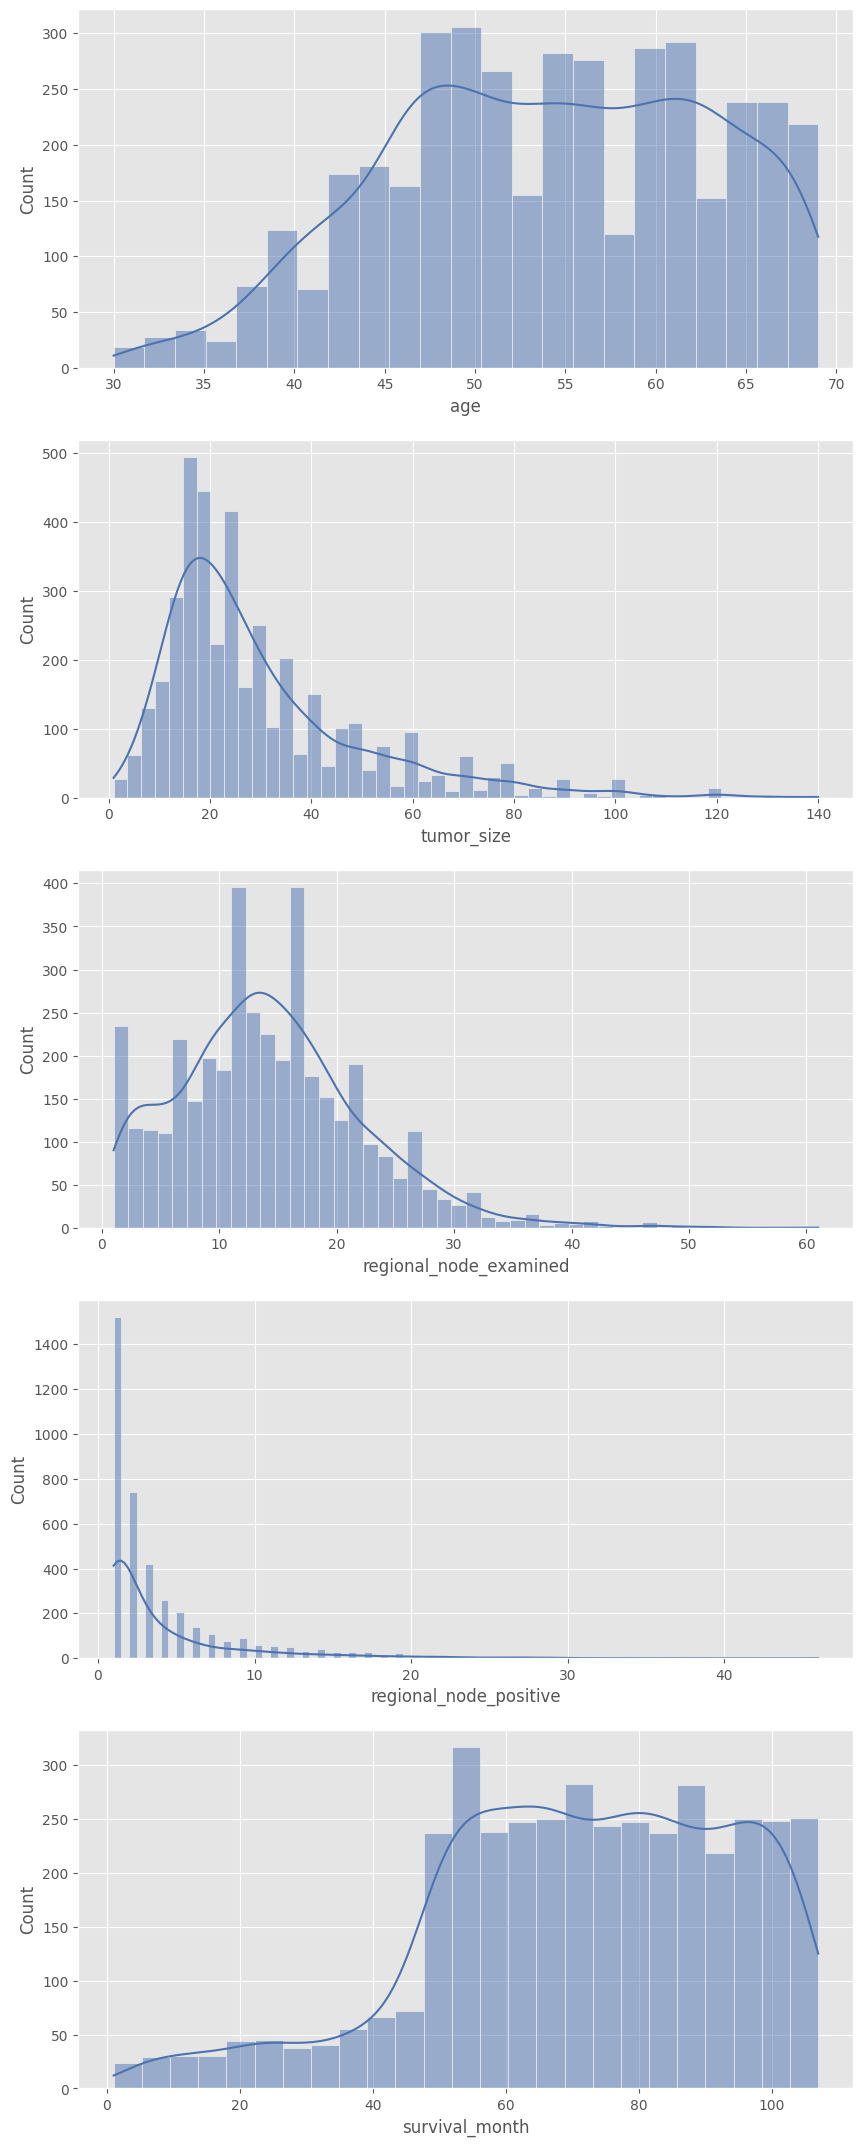

In [24]:
fig, ax = plt.subplots(5, 1, figsize=(10,27))
for i, axs in enumerate(ax.flatten()):
    sns.histplot(cancer_data[numerical_features[i]], ax=axs, kde=True)

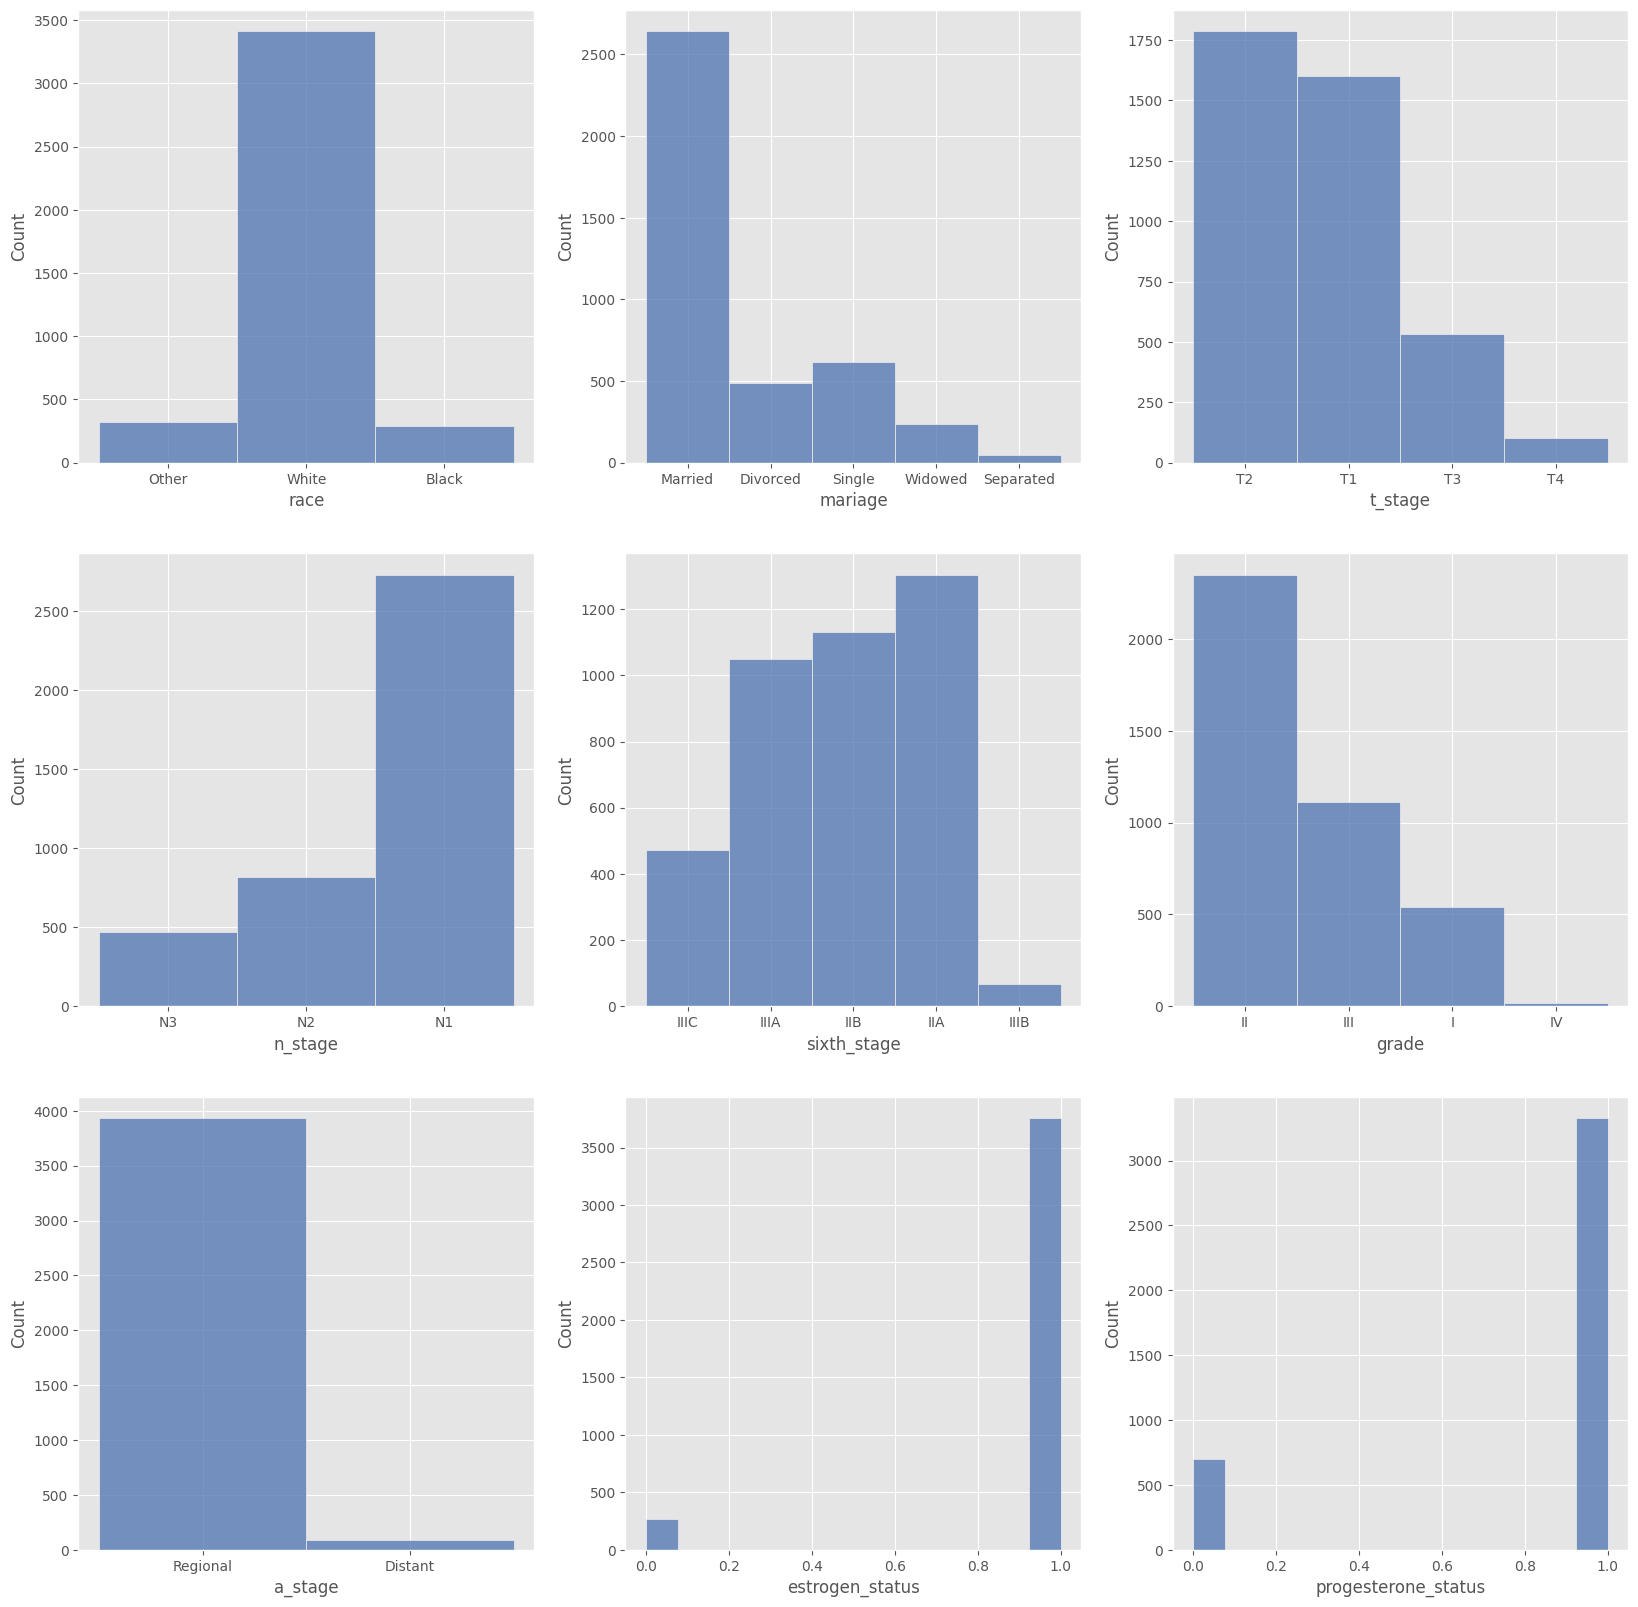

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
for i, axs in enumerate(ax.flatten()):
    sns.histplot(cancer_data[categorical_features[i]], ax=axs)

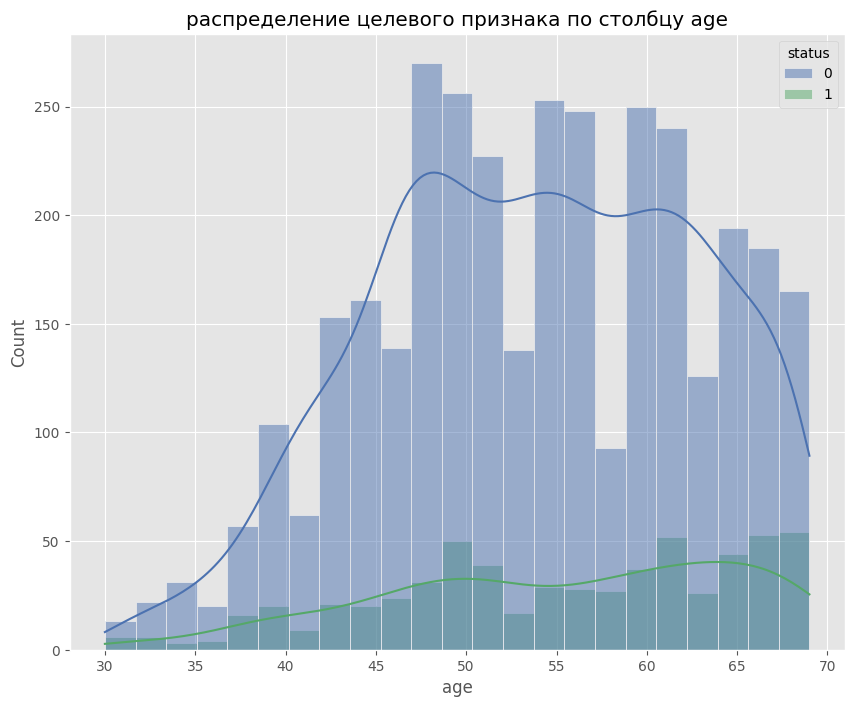

Описательные статистики по столбцу age в зависимости от статуса


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3407.0,53.756384,8.808290,30.0,47.0,54.0,61.0,69.0
1,616.0,55.150974,9.698291,30.0,48.0,56.5,63.0,69.0


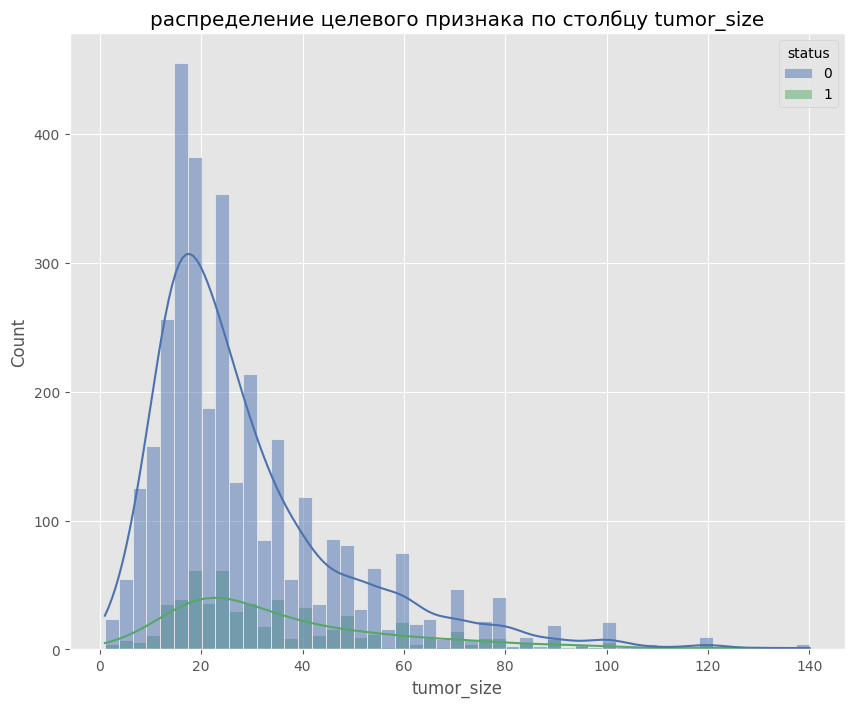

Описательные статистики по столбцу tumor_size в зависимости от статуса


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3407.0,29.27238,20.305066,1.0,15.0,23.0,35.0,140.0
1,616.0,37.13961,24.116115,1.0,20.0,30.0,50.0,140.0


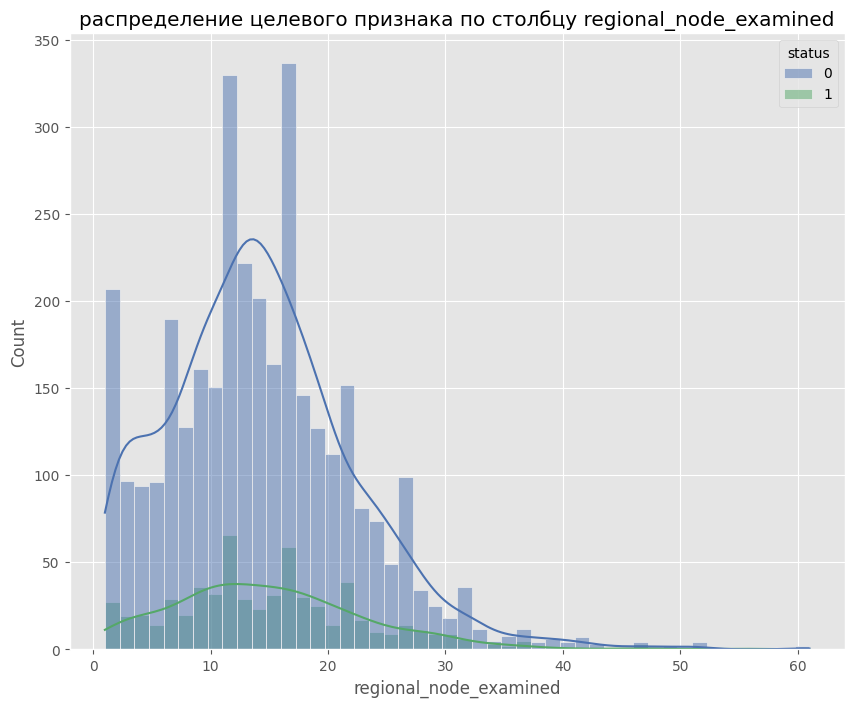

Описательные статистики по столбцу regional_node_examined в зависимости от статуса


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3407.0,14.238920,8.023884,1.0,9.0,14.0,19.0,61.0
1,616.0,15.019481,8.486600,1.0,9.0,14.0,20.0,57.0


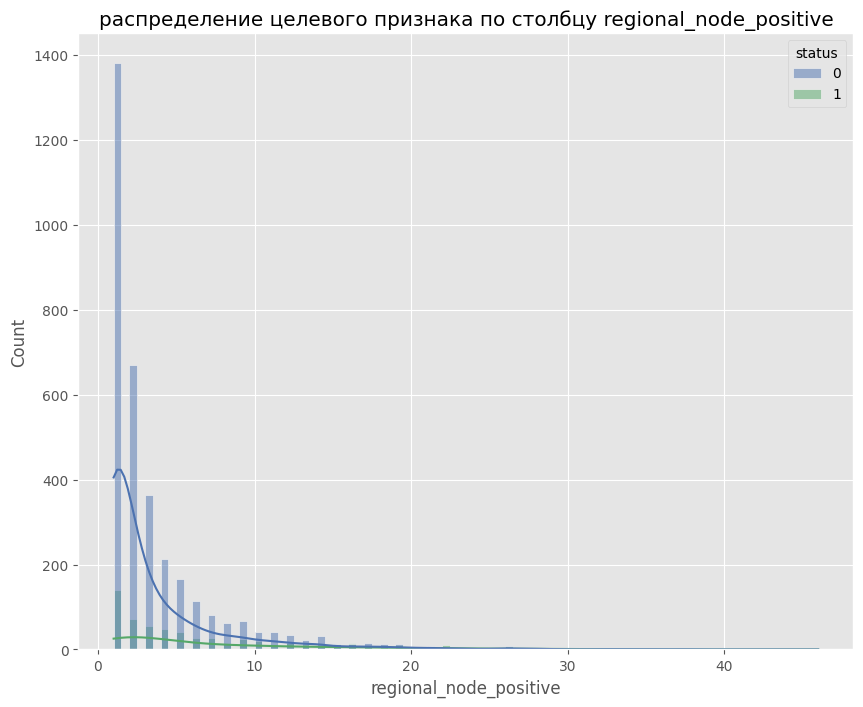

Описательные статистики по столбцу regional_node_positive в зависимости от статуса


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3407.0,3.601409,4.375595,1.0,1.0,2.0,4.0,41.0
1,616.0,7.241883,7.312642,1.0,2.0,4.0,10.0,46.0


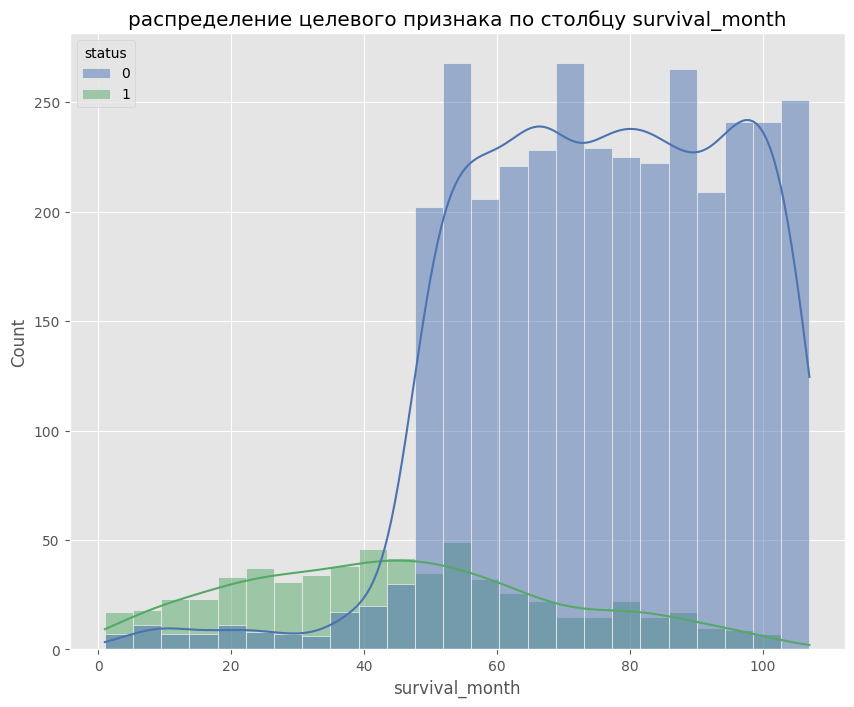

Описательные статистики по столбцу survival_month в зависимости от статуса


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,3407.0,75.946874,19.386293,1.0,61.0,77.0,92.0,107.0
1,616.0,45.610390,23.966253,2.0,27.0,44.0,61.0,102.0


In [49]:
for i, feature in enumerate(numerical_features):
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    sns.histplot(
        data=cancer_data, 
        x=feature, 
        ax=ax, 
        hue='status',
        kde=True
    )
    ax.set_title(f"распределение целевого признака по столбцу {feature}")
    plt.show()
    print(f"Описательные статистики по столбцу {feature} в зависимости от статуса")
    display(
        cancer_data.groupby('status')[feature].describe()
    )

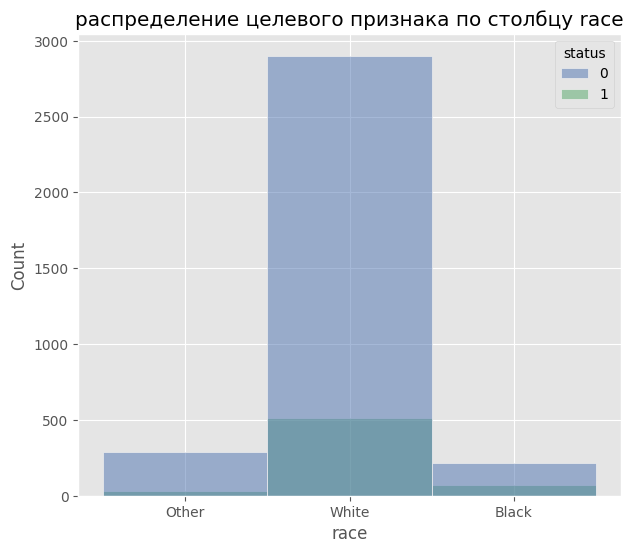

Распределение целевой пременной в зависимости от race


race   status
Black  0          218
       1           73
Other  0          287
       1           33
White  0         2902
       1          510
Name: status, dtype: int64

Распределение целевой пременной в зависимости от race в процентах


race   status
Black  0         0.749141
       1         0.250859
Other  0         0.896875
       1         0.103125
White  0         0.850528
       1         0.149472
Name: status, dtype: float64

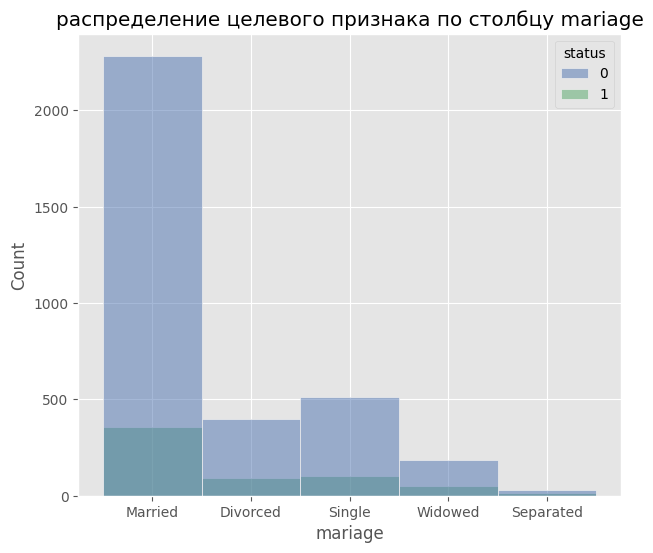

Распределение целевой пременной в зависимости от mariage


mariage    status
Divorced   0          396
           1           90
Married    0         2284
           1          358
Separated  0           30
           1           15
Single     0          511
           1          104
Widowed    0          186
           1           49
Name: status, dtype: int64

Распределение целевой пременной в зависимости от mariage в процентах


mariage    status
Divorced   0         0.814815
           1         0.185185
Married    0         0.864497
           1         0.135503
Separated  0         0.666667
           1         0.333333
Single     0         0.830894
           1         0.169106
Widowed    0         0.791489
           1         0.208511
Name: status, dtype: float64

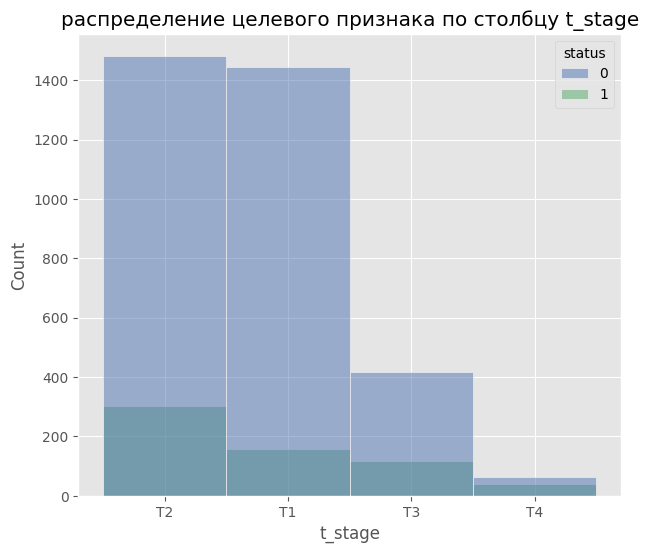

Распределение целевой пременной в зависимости от t_stage


t_stage  status
T1       0         1445
         1          157
T2       0         1483
         1          303
T3       0          417
         1          116
T4       0           62
         1           40
Name: status, dtype: int64

Распределение целевой пременной в зависимости от t_stage в процентах


t_stage  status
T1       0         0.901998
         1         0.098002
T2       0         0.830347
         1         0.169653
T3       0         0.782364
         1         0.217636
T4       0         0.607843
         1         0.392157
Name: status, dtype: float64

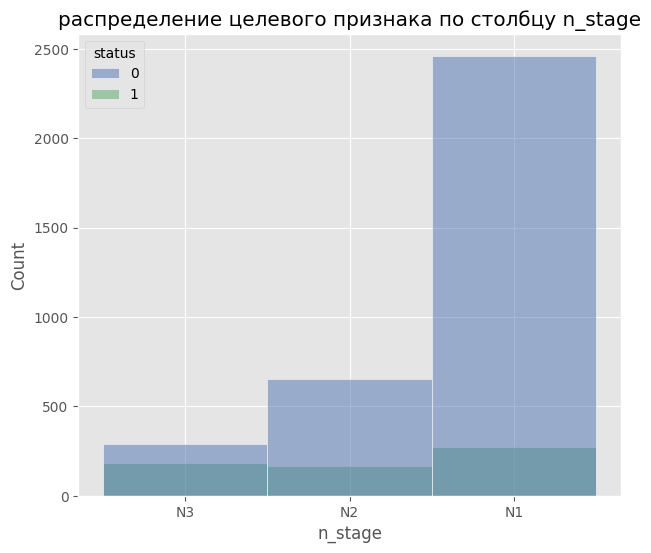

Распределение целевой пременной в зависимости от n_stage


n_stage  status
N1       0         2461
         1          270
N2       0          655
         1          165
N3       0          291
         1          181
Name: status, dtype: int64

Распределение целевой пременной в зависимости от n_stage в процентах


n_stage  status
N1       0         0.901135
         1         0.098865
N2       0         0.798780
         1         0.201220
N3       0         0.616525
         1         0.383475
Name: status, dtype: float64

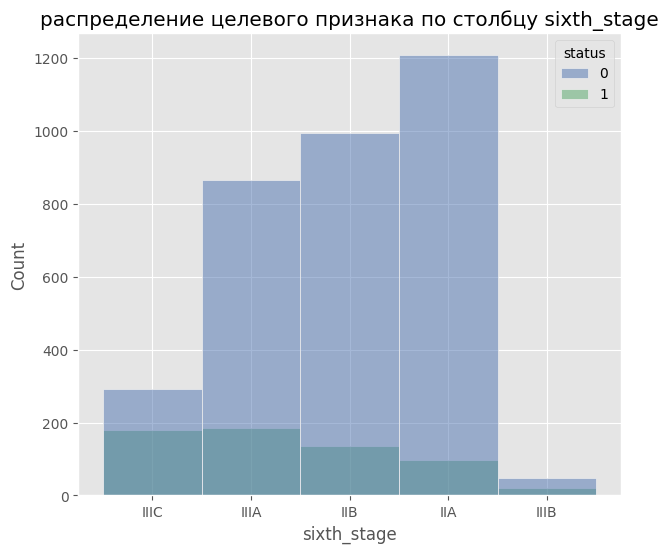

Распределение целевой пременной в зависимости от sixth_stage


sixth_stage  status
IIA          0         1208
             1           96
IIB          0          995
             1          135
IIIA         0          866
             1          184
IIIB         0           47
             1           20
IIIC         0          291
             1          181
Name: status, dtype: int64

Распределение целевой пременной в зависимости от sixth_stage в процентах


sixth_stage  status
IIA          0         0.926380
             1         0.073620
IIB          0         0.880531
             1         0.119469
IIIA         0         0.824762
             1         0.175238
IIIB         0         0.701493
             1         0.298507
IIIC         0         0.616525
             1         0.383475
Name: status, dtype: float64

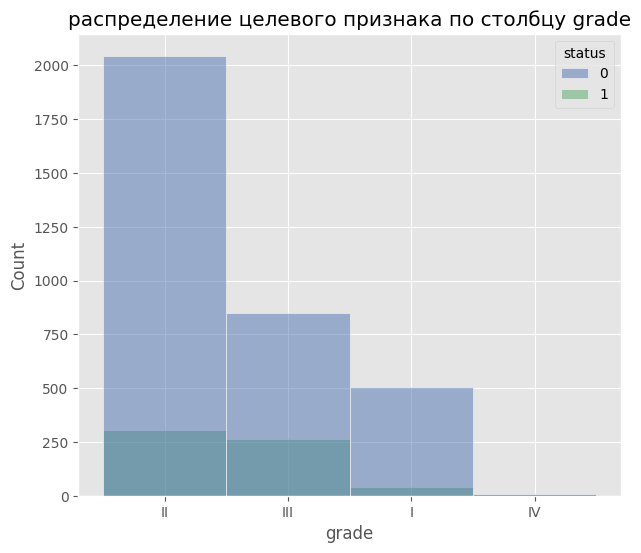

Распределение целевой пременной в зависимости от grade


grade  status
I      0          504
       1           39
II     0         2045
       1          305
III    0          848
       1          263
IV     0           10
       1            9
Name: status, dtype: int64

Распределение целевой пременной в зависимости от grade в процентах


grade  status
I      0         0.928177
       1         0.071823
II     0         0.870213
       1         0.129787
III    0         0.763276
       1         0.236724
IV     0         0.526316
       1         0.473684
Name: status, dtype: float64

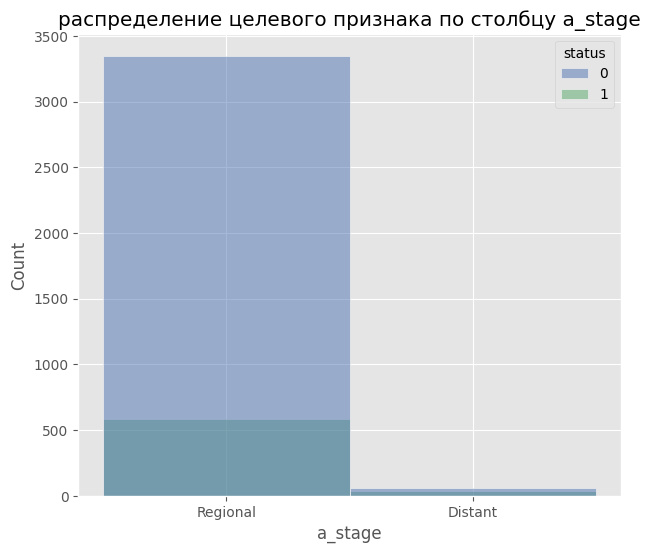

Распределение целевой пременной в зависимости от a_stage


a_stage   status
Distant   0           57
          1           35
Regional  0         3350
          1          581
Name: status, dtype: int64

Распределение целевой пременной в зависимости от a_stage в процентах


a_stage   status
Distant   0         0.619565
          1         0.380435
Regional  0         0.852200
          1         0.147800
Name: status, dtype: float64

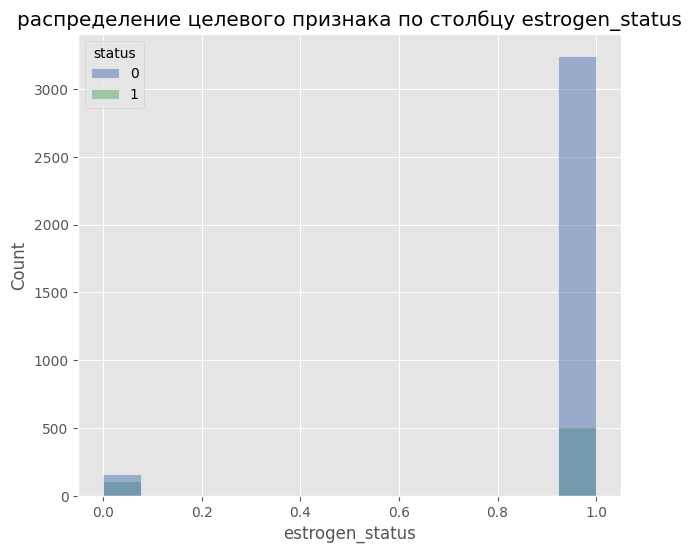

Распределение целевой пременной в зависимости от estrogen_status


estrogen_status  status
0                0          161
                 1          108
1                0         3246
                 1          508
Name: status, dtype: int64

Распределение целевой пременной в зависимости от estrogen_status в процентах


estrogen_status  status
0                0         0.598513
                 1         0.401487
1                0         0.864678
                 1         0.135322
Name: status, dtype: float64

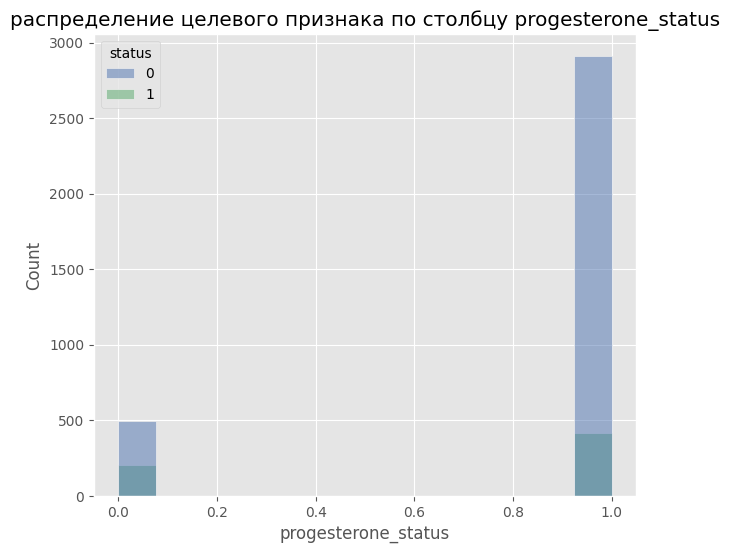

Распределение целевой пременной в зависимости от progesterone_status


progesterone_status  status
0                    0          494
                     1          204
1                    0         2913
                     1          412
Name: status, dtype: int64

Распределение целевой пременной в зависимости от progesterone_status в процентах


progesterone_status  status
0                    0         0.707736
                     1         0.292264
1                    0         0.876090
                     1         0.123910
Name: status, dtype: float64

In [70]:
for i, feature in enumerate(categorical_features):
    fig, ax = plt.subplots(1, 1, figsize=(7, 6))
    sns.histplot(data=cancer_data, 
                 x=feature, 
                 ax=ax, 
                 hue='status'
                )
    ax.set_title(f"распределение целевого признака по столбцу {feature}")
    plt.show()
    print(f"Распределение целевой пременной в зависимости от {feature}")
    display(
        cancer_data.groupby(feature)['status'].value_counts()
    )
    print(f"Распределение целевой пременной в зависимости от {feature} в процентах")
    display(
        cancer_data.groupby(feature)['status'].value_counts() / cancer_data.groupby(feature)['status'].count()
    )

C:\Users\Windows\AppData\Local\Temp\ipykernel_40576\1789571772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cancer_data.corr(), annot=True)


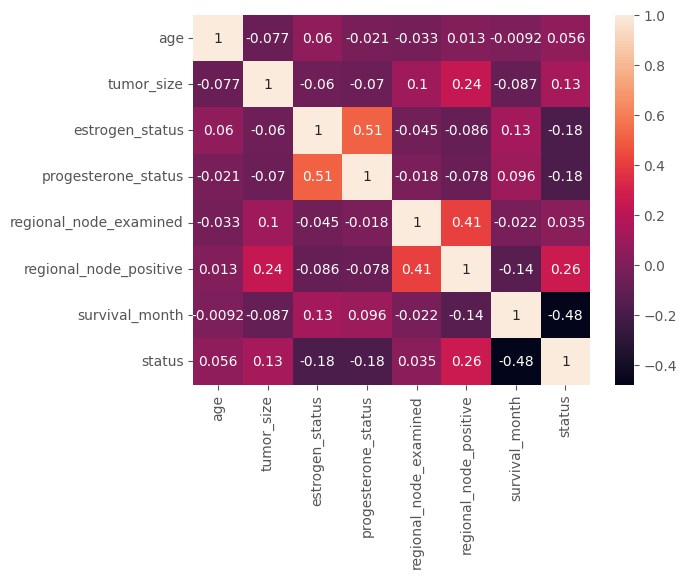

In [51]:
sns.heatmap(cancer_data.corr(), annot=True)
None

***Looks like we dont have high-correlated features, so we don't need to drop any column***

# Models

* **ADASYN**
* **SMOTE**